In [6]:
import numpy as np
import matplotlib.pyplot as plt

(-2.73518518412182, 2.576188417829885, -0.9402064577386257, 1.0120021304499334)

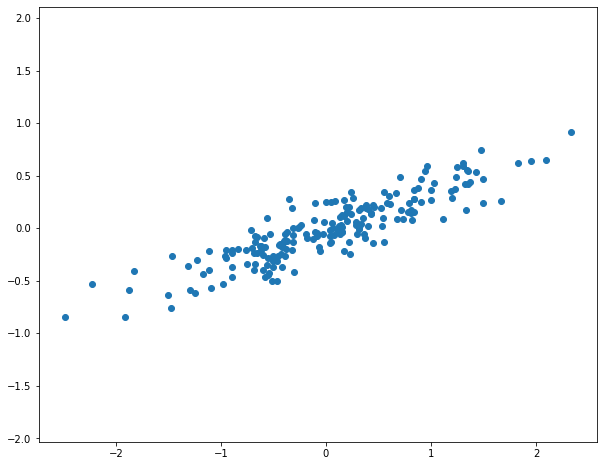

In [9]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
pca.components_

array([[-0.94446029, -0.32862557]])

1.0

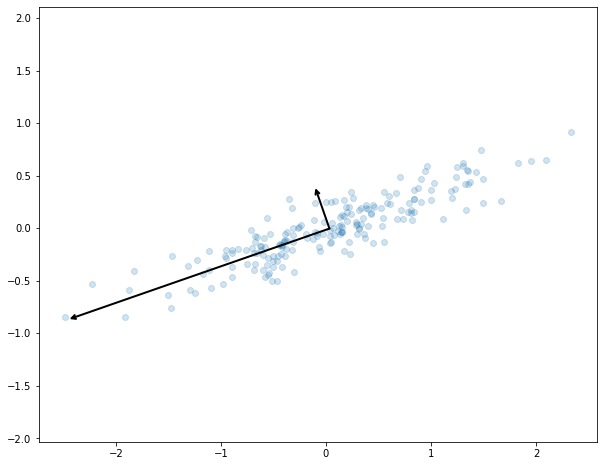

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [59]:
pca = PCA().fit(X)
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

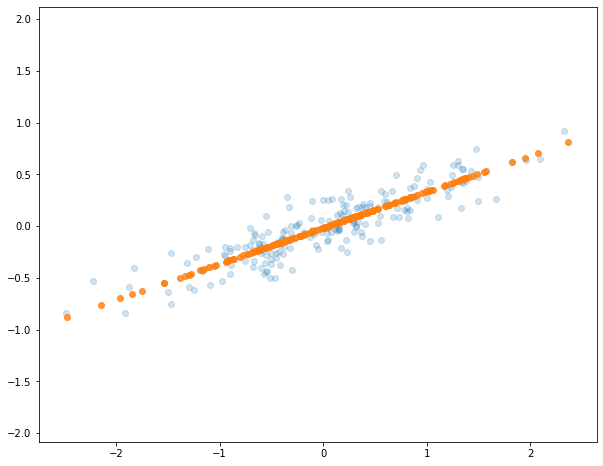

In [23]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_new = pca.inverse_transform(X_pca)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [53]:
X_new

array([[-0.60566999, -0.22648439],
       [ 1.0452307 ,  0.34794757],
       [-0.65397264, -0.24329133],
       [-2.14785286, -0.76308793],
       [-0.56154772, -0.21113202],
       [-0.93407737, -0.34075396],
       [-0.70050728, -0.25948309],
       [ 1.35251105,  0.45486597],
       [ 0.30839673,  0.09156571],
       [-1.75023588, -0.62473684],
       [ 0.70553701,  0.22975093],
       [-0.56988901, -0.21403438],
       [-0.48410886, -0.18418712],
       [ 0.24064357,  0.06799096],
       [ 0.39976345,  0.12335682],
       [-0.64198517, -0.23912028],
       [ 1.05705933,  0.35206335],
       [ 0.31677176,  0.09447981],
       [ 0.78610394,  0.25778425],
       [ 0.80095021,  0.26295002],
       [ 1.48815318,  0.50206274],
       [ 0.27238503,  0.07903542],
       [-0.55815912, -0.20995296],
       [ 1.55416425,  0.52503133],
       [-0.44272351, -0.16978706],
       [-0.48965864, -0.18611817],
       [-0.61052642, -0.22817419],
       [ 0.05241574,  0.00249696],
       [-0.07373257,

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [40]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [41]:
projected[:, 0]

array([-1.25946672,  7.95761032,  6.99192366, ..., 10.80128443,
       -4.87210227, -0.34438812])

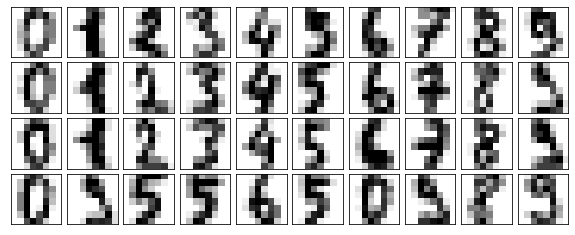

In [42]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', #interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [43]:
digits.data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [44]:
pca = PCA(10).fit(digits.data)

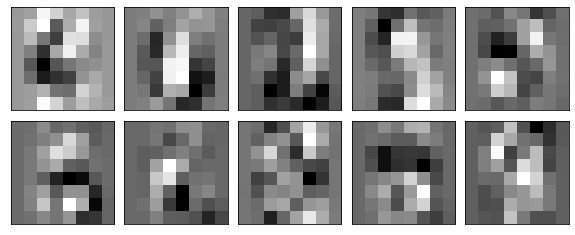

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(8, 8), cmap='binary')

In [81]:
pca.components_[0]

array([-5.18398948e-18, -1.73094754e-02, -2.23428863e-01, -1.35913244e-01,
       -3.30321146e-02, -9.66343493e-02, -8.32950227e-03,  2.26902188e-03,
       -3.20514619e-04, -1.19308799e-01, -2.44451465e-01,  1.48512728e-01,
       -4.67317557e-02, -2.17740660e-01, -1.48136478e-02,  4.47782004e-03,
       -4.94124045e-05, -7.95418388e-02,  8.33952154e-02,  2.15915485e-01,
       -1.72126762e-01, -1.63712088e-01,  2.86446590e-02,  4.23253502e-03,
        9.85490230e-05,  6.42318165e-02,  2.54093231e-01, -3.56768824e-02,
       -2.09462862e-01, -4.31312742e-02,  5.13120546e-02,  2.13423532e-04,
        0.00000000e+00,  1.59950859e-01,  3.68690642e-01,  1.64406772e-01,
        8.52008659e-02,  3.72983359e-02,  2.15866283e-02,  0.00000000e+00,
        1.28865808e-03,  1.06945387e-01,  3.03067501e-01,  2.47813009e-01,
        2.09637554e-01,  1.22328841e-02, -3.69458998e-02,  1.61484702e-03,
        6.93024507e-04, -8.35142625e-03, -5.58598884e-02,  9.30532941e-02,
        1.07387335e-01, -

In [1]:
from sklearn.datasets import fetch_lfw_people
from PIL import Image
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [56]:
pca = PCA(24, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

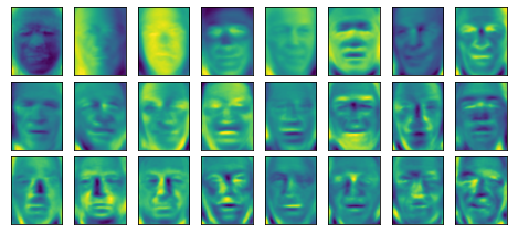

In [57]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47))

In [58]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

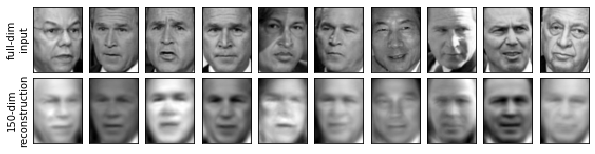

In [59]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [60]:
print(projected.shape)
print(faces.data.shape)
print(components.shape)
print(pca.components_.shape)

(1348, 2914)
(1348, 2914)
(1348, 24)
(24, 2914)


In [55]:
components[0]

array([1143.0276,  633.1992], dtype=float32)